In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from acquire import get_telco_data
from telco_prep import *
from matplotlib import cm

from scipy.stats import ttest_ind as ttest
from scipy.stats import pearsonr

In [2]:
df = get_telco_data()

In [3]:
df = prep_telco_data(df)

/Users/mcapper/Documents/Codeup/classification_project/classification_orion_matthew/telco_prep.py:94: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)


In [4]:
df = drop_cols(df)

In [5]:
# 11: Numeric Scaling: scale the monthly_charges and total_charges data. 
# Make sure that the parameters for scaling are learned from the training data set.

# ~~~~~SPLIT~~~~~
# ~~This is also #9 ~~
X = df.drop(['churn'], axis = 1)
y = df[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

scaler = MinMaxScaler()
scaler.fit(train[['monthly_charges', 'total_charges']])

train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,tenure_year,phone_id,household_type_id,streaming_services,online_security_backup,gender_e,device_protection_e,tech_support_e,paperless_billing_e,churn
1479,0,52,1,2,1,0.502488,0.399729,5,1,3,1,2,1,2,2,1,0
2377,0,59,1,3,4,0.716915,0.597190,5,2,3,3,3,0,2,2,0,0
6613,0,46,3,3,3,0.019900,0.100571,4,1,3,0,0,0,1,1,0,0
6468,0,55,3,3,3,0.074129,0.164418,5,2,1,0,0,1,1,1,0,0
2668,0,10,2,1,1,0.613930,0.096746,1,1,1,1,0,1,0,0,1,1


In [7]:
cols = []
for col in train:
    cols.append(col)
cols


# cmap = cm.get_cmap('gnuplot')
# scatter = pd.scatter_matrix(
#     train[cols], marker='o', s=40,
#     hist_kwds={'bins':15},  figsize=(14,8), cmap=cmap)

['senior_citizen',
 'tenure',
 'internet_service_type_id',
 'contract_type_id',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'tenure_year',
 'phone_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup',
 'gender_e',
 'device_protection_e',
 'tech_support_e',
 'paperless_billing_e',
 'churn']

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


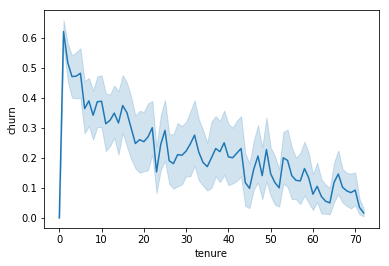

In [8]:
sns.lineplot(x='tenure', y='churn', data=df)

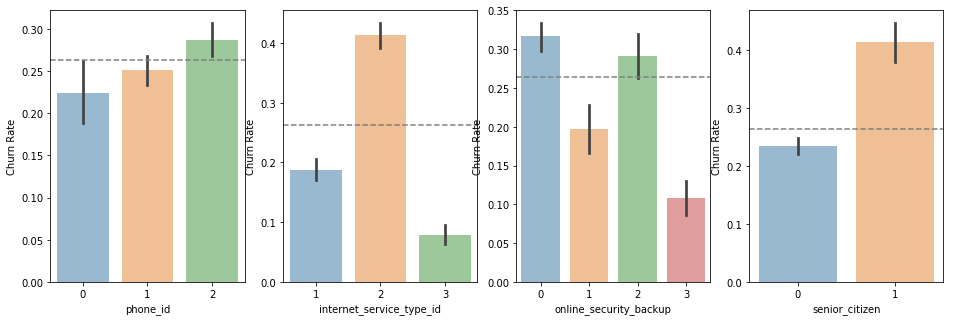

In [10]:
features = ['phone_id', 'internet_service_type_id', 'online_security_backup', 'senior_citizen']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [24]:
higher_monthly_charges = train[['churn']][train.monthly_charges > train.monthly_charges.quantile(0.70)]
lower_monthly_charges = train[['churn']][train.monthly_charges < train.monthly_charges.quantile(0.70)]
ttest(higher_monthly_charges, lower_monthly_charges)

Ttest_indResult(statistic=array([8.46549123]), pvalue=array([3.07307002e-17]))

In [27]:
higher_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges > train.monthly_charges.quantile(0.70)]
lower_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges < train.monthly_charges.quantile(0.70)]

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


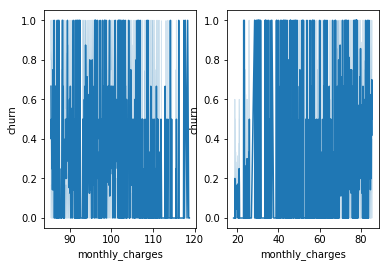

In [26]:

plt.subplot(1, 2, 1)
sns.lineplot(x='monthly_charges', y='churn', data=higher_monthly_charges)
plt.subplot(1, 2, 2)
sns.lineplot(x='monthly_charges', y='churn', data=lower_monthly_charges)

### # 4: is the churn rate significantly different for those on a month-to-month plan after month 12 than those on 1 year contracts after 12th month?


In [39]:
year_old_monthlies = train[train.tenure >= 12][train.contract_type_id == 1]
year_old_monthlies.head()
year_old_contract = train[train.tenure >= 12][train.contract_type_id == 2]
ttest(year_old_monthlies.churn, year_old_contract.churn)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Ttest_indResult(statistic=11.62871844836295, pvalue=2.016256590347219e-30)

In [29]:
# 5: are the mean monthly charges for those who have churned significantly different than for
# those who have not churned?
has_churned = train[train.churn == 1]
not_churned = train[train.churn == 0]
for col in train:
    ttest(has_churned.monthly_charges, notchurned.monthly_charges)
ttest(has_churned.monthly_charges, not_churned.monthly_charges)

Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)

In [54]:
# How much of monthly_charges can be explained by internet_service_type? 
# (hint: correlation test). State your hypotheses and your conclusion clearly.
cor_test = train[['monthly_charges', 'internet_service_type_id']]
cor_test.groupby('internet_service_type_id').mean()
# sns.heatmap(cor_test.corr(), annot=True)
# pearsonr(cor_test.internet_service_type_id, cor_test.monthly_charges)
# pearsonr()

,monthly_charges
internet_service_type_id,
1,0.395787
2,0.727289
3,0.028222


### #6: How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

In [55]:
train['int_type_id'] = train['internet_service_type_id'].replace({3: 0, 2: 2, 1: 1})

In [56]:
train[['int_type_id', 'internet_service_type_id']].head()

,int_type_id,internet_service_type_id
1479,1,1
2377,1,1
6613,0,3
6468,0,3
2668,2,2


In [57]:
pearsonr(train.int_type_id, train.monthly_charges)


(0.9059453029899808, 0.0)

In [58]:
no_int = train[train.int_type_id == 0]
dsl_int = train[train.int_type_id == 1]
fbr_int = train[train.int_type_id == 2]

In [61]:
for i in (no_int, dsl_int, fbr_int):
    print(ttest(i.monthly_charges, i.churn))
    print(pearsonr(i.monthly_charges, i.churn))

Ttest_indResult(statistic=-6.120712912522637, pvalue=1.1065031150416752e-09)
(-0.10086204524930596, 0.0009967140153946748)
Ttest_indResult(statistic=20.34269354091509, pvalue=6.9262822961096465e-87)
(-0.25735349620897335, 5.143468440547046e-27)
Ttest_indResult(statistic=28.849608415494284, pvalue=1.2977112085035131e-167)
(-0.23017545767238606, 1.5193247315385181e-27)
